In [2]:
require(data.table)
require(tidyverse)

## 1. load data

In [10]:
dat.pro_ps.smooth<- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_smoothed.txt")
dat.pro_ps.raw <- fread("../dat/1901/alpha_beta.promoter.long_100bin_transcripts_ps_raw.txt")
head(dat.pro_ps.smooth)

bin,gene_tr.idx,percent_open,celltype
1,AAGAB_42733,0.5174754,alpha
2,AAGAB_42733,0.4584599,alpha
3,AAGAB_42733,0.4025329,alpha
4,AAGAB_42733,0.3496216,alpha
5,AAGAB_42733,0.2996535,alpha
6,AAGAB_42733,0.2525558,alpha


In [11]:
dat.pro_ps.wd <- dat.pro_ps.smooth%>%group_by(celltype)%>%spread(key = bin,value = percent_open)
head(dat.pro_ps.wd)
tail(dat.pro_ps.wd)
dim(dat.pro_ps.wd)
table(dat.pro_ps.wd$celltype)

gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
AAGAB_42733,alpha,0.517475430,0.4584599115,0.40253285,0.349621593,0.299653469,0.252555820,0.208255983,0.1666812969,⋯,20.073912,20.958403,21.861378,22.782948,23.723223,24.682317,25.660339,26.657403,27.673618,28.709097
AAMDC_22628,alpha,0.107309404,0.0905332797,0.07479448,0.060041427,0.046222515,0.033286159,0.021180767,0.0098547474,⋯,30.158963,31.859239,33.608425,35.406036,37.251593,39.144612,41.084613,43.071114,45.103632,47.181686
AATF_55762,alpha,0.052832477,0.0434042464,0.03464963,0.026548186,0.019079467,0.012223029,0.005958428,0.0002652184,⋯,14.783726,15.832790,16.920715,18.046729,19.210057,20.409928,21.645568,22.916203,24.221063,25.559372
ABCA2_129618,alpha,0.028167395,0.0230714302,0.01826746,0.013753604,0.009527968,0.005588668,0.001933818,-0.0014384706,⋯,5.266054,5.504649,5.747715,5.995334,6.247590,6.504564,6.766340,7.033000,7.304627,7.581303
ABCB1_117182,beta,0.003574929,0.0003861186,-0.00206902,-0.003813677,-0.004871042,-0.005264307,-0.005016662,-0.0041512974,⋯,4.321622,4.635768,4.963775,5.305248,5.659789,6.027000,6.406485,6.797846,7.200686,7.614609
ABCB10_11455,alpha,0.354779695,0.2989321545,0.24618759,0.196418305,0.149496610,0.105294810,0.063685213,0.0245401246,⋯,25.242513,26.504026,27.799714,29.129184,30.492040,31.887888,33.316332,34.776977,36.269429,37.793293


gene_tr.idx,celltype,1,2,3,4,5,6,7,8,⋯,91,92,93,94,95,96,97,98,99,100
ZSWIM5_3921,beta,0.905616254,0.72566900,0.55858973,0.40451444,0.26357912,0.13591975,0.02167233,-0.07902716,⋯,13.0153363,13.3237773,13.646680,13.9833003,14.3328942,14.6947175,15.0680261,15.4520761,15.8461232,16.2494233
ZSWIM7_53953,alpha,0.370445702,0.31089499,0.25486525,0.20221831,0.15281599,0.10652011,0.06319250,0.02269500,⋯,24.9517283,26.3641159,27.822880,29.3271461,30.8760387,32.4686831,34.1042041,35.7817270,37.5003765,39.2592779
ZSWIM8_14081,alpha,0.428704019,0.39152466,0.35625381,0.32279802,0.29106390,0.26095802,0.23238696,0.20525731,⋯,12.7607191,13.1105608,13.458927,13.8062725,14.1530512,14.4997176,14.8467259,15.1945304,15.5435854,15.8943452
ZZEF1_52562,alpha,3.628494909,3.83723216,4.03752532,4.22943972,4.41304069,4.58839357,4.75556369,4.91461637,⋯,0.1787657,0.1670852,0.157122,0.1490678,0.1431143,0.1394534,0.1382769,0.1397765,0.1441439,0.1515711
ZZEF1_52568,alpha,-0.003552642,-0.00771986,-0.01138294,-0.01451242,-0.01707885,-0.01905275,-0.02040468,-0.02110516,⋯,16.3651026,17.3965361,18.460209,19.5557453,20.6827691,21.8409044,23.0297752,24.2490056,25.4982196,26.7770413
ZZZ3_5178,alpha,0.553389422,0.49684720,0.44360701,0.39353162,0.34648381,0.30232635,0.26092201,0.22213357,⋯,33.9751645,35.6904905,37.454158,39.2656008,41.1242532,43.0295489,44.9809220,46.9778065,49.0196364,51.1058456


[1] 3219  102


alpha  beta 
 2315   904 

## 2. updated cluster 
[QuickR](https://www.statmethods.net/advstats/cluster.html) introduces the following methods categories:
1. Partitioning based methods or Centroid-based clustering: `kmeans`, `pam`
2. Hierarchical Agglomerative: `hclust`, `pvclust`
3. Model based: `mclust`
4. Density-based: [`DBSCAN`](https://en.wikipedia.org/wiki/DBSCAN)

More complete intro can be found [cluster analysis@WIKI](https://en.wikipedia.org/wiki/Cluster_analysis)
Also they introduced:
1. cluster compare: `fpc::cluster.stats`

Because the goal is to find dynamical patterns, I would like to choose 1. (i.e. kmeans or pam)


In [55]:
require(fpc)
dat.sub <- dat.pro_ps.wd%>%
    as.data.frame()%>%
    filter(celltype=='alpha')%>%
    column_to_rownames("gene_tr.idx")%>%
    select(-celltype)

### 2.1 filter max percent_open < 10% 

In [48]:
t(quantile(apply(dat.sub,1,max),probs = c(0,.05,.1,.25,.5,.75,.9,.95,1))) 
# filter on 10
tr.keep <- apply(dat.sub,1,max)>=10
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]

0%,5%,10%,25%,50%,75%,90%,95%,100%
0.782,4.61,6.99,14.3,23.2,32.4,41.7,46.8,78.4


tr.keep
FALSE  TRUE 
  359  1956 

In [52]:
dat.sub.2.scale <- t(apply(dat.sub,1,function(x) x/max(x)))
head(dat.sub.2.scale)                       

,1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
AAGAB_42733,0.01802,0.01597,0.01402,0.012178,0.010438,0.008797,0.007254,5.81e-03,4.45e-03,0.003184,⋯,0.699,0.730,0.761,0.794,0.826,0.860,0.894,0.929,0.964,1
AAMDC_22628,0.00227,0.00192,0.00159,0.001273,0.000980,0.000705,0.000449,2.09e-04,-1.58e-05,-0.000226,⋯,0.639,0.675,0.712,0.750,0.790,0.830,0.871,0.913,0.956,1
AATF_55762,0.00207,0.00170,0.00136,0.001039,0.000746,0.000478,0.000233,1.04e-05,-1.91e-04,-0.000371,⋯,0.578,0.619,0.662,0.706,0.752,0.799,0.847,0.897,0.948,1
ABCA2_129618,0.00372,0.00304,0.00241,0.001814,0.001257,0.000737,0.000255,-1.90e-04,-5.98e-04,-0.000969,⋯,0.695,0.726,0.758,0.791,0.824,0.858,0.893,0.928,0.964,1
ABCB10_11455,0.00939,0.00791,0.00651,0.005197,0.003956,0.002786,0.001685,6.49e-04,-3.25e-04,-0.001240,⋯,0.668,0.701,0.736,0.771,0.807,0.844,0.882,0.920,0.960,1
ABCB9_32864,0.00325,0.00243,0.00166,0.000949,0.000298,-0.000292,-0.000820,-1.28e-03,-1.68e-03,-0.002012,⋯,0.555,0.598,0.643,0.689,0.737,0.787,0.838,0.890,0.945,1


In [53]:
pk <- pamk(dat.sub.2,critout=T)
pk.scale<- pamk(dat.sub.2.scale,critout=T)

2  clusters  0.475 
3  clusters  0.408 
4  clusters  0.456 
5  clusters  0.434 
6  clusters  0.415 
7  clusters  0.383 
8  clusters  0.361 
9  clusters  0.371 
10  clusters  0.349 
2  clusters  0.903 
3  clusters  0.516 
4  clusters  0.472 
5  clusters  0.463 
6  clusters  0.432 
7  clusters  0.398 
8  clusters  0.371 
9  clusters  0.345 
10  clusters  0.322 


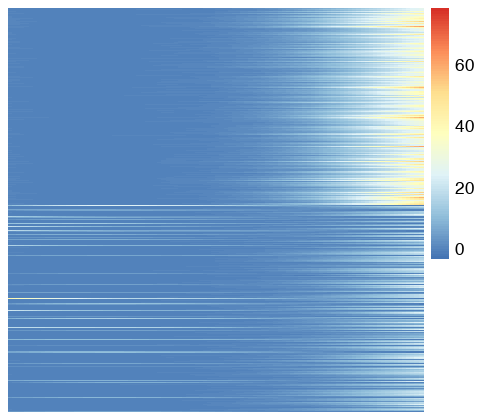

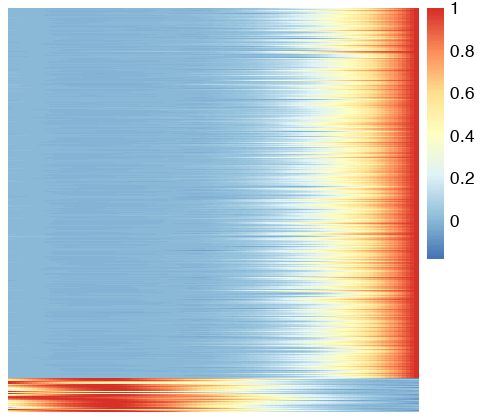

In [54]:
options(repr.plot.width=4, repr.plot.height=3.5)
require(pheatmap)

pheatmap(dat.sub.2[order(pk$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)
pheatmap(dat.sub.scale.2[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

### 2.2 filter bottom < 5% 

tr.keep
FALSE  TRUE 
  129  2186 

2  clusters  0.907 
3  clusters  0.518 
4  clusters  0.48 
5  clusters  0.475 
6  clusters  0.443 
7  clusters  0.397 
8  clusters  0.384 
9  clusters  0.355 
10  clusters  0.334 



   1    2 
2033  153 

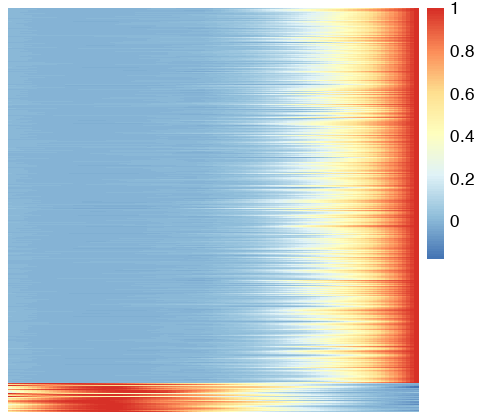

In [83]:
tr.keep <- apply(dat.sub,1,max)>=5
table(tr.keep)
dat.sub.2 <- dat.sub[tr.keep,]
dat.sub.2.scale <- t(apply(dat.sub.2,1,function(x) x/max(x)))
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

2  clusters  0.501 
3  clusters  0.462 
4  clusters  0.428 
5  clusters  0.378 
6  clusters  0.353 
7  clusters  0.333 
8  clusters  0.324 
9  clusters  0.305 
10  clusters  0.28 



   1    2 
 872 1161 

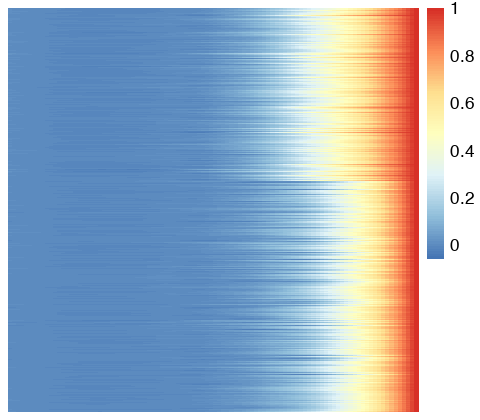

In [84]:
dat.sub.2.scale.1 <- dat.sub.2.scale[pk.scale$pamobject$clustering==1,]
pk.scale<- pamk(dat.sub.2.scale.1,critout=T)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale.1[order(pk.scale$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

2  clusters  0.647 
3  clusters  0.348 
4  clusters  0.311 
5  clusters  0.288 
6  clusters  0.311 
7  clusters  0.282 
8  clusters  0.298 
9  clusters  0.3 
10  clusters  0.298 



  1   2 
124  29 

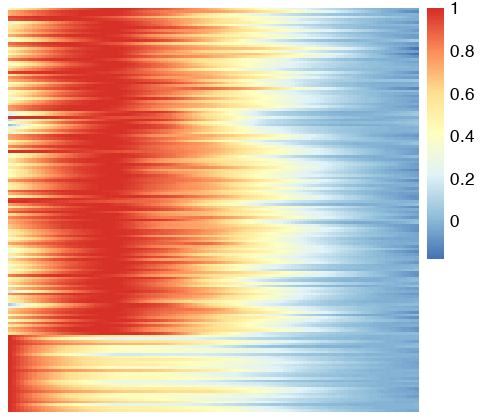

In [67]:
dat.sub.2.scale <- dat.sub.2.scale[pk.scale$pamobject$clustering==2,]
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],
         border_color = NA,scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

In [82]:
glist.a1<- list()
glist.a1$c1<- unique(as.character(sapply(names(which(pk.scale$pamobject$clustering==1)),function(x) unlist(strsplit(x,split = "_"))[1])))
glist.a1$c2<- unique(as.character(sapply(names(which(pk.scale$pamobject$clustering==2)),function(x) unlist(strsplit(x,split = "_"))[1])))
glist.a1        
t(lapply(glist.a1,length))

$c1
  [1] "ABCC8"        "ABLIM2"       "ADCK1"        "ADCK3"        "AHCYL1"      
  [6] "AK2"          "ANK2"         "ANXA6"        "APBB1"        "ARHGAP1"     
 [11] "ARHGEF40"     "ARVCF"        "ATP1B1"       "BANK1"        "BOC"         
 [16] "C20orf196"    "C21orf58"     "CACUL1"       "CCDC150"      "CCDC6"       
 [21] "CDH22"        "CERKL"        "CHGA"         "CLIP4"        "DCUN1D4"     
 [26] "DDC"          "DEPTOR"       "DHRS2"        "DLG2"         "EMB"         
 [31] "EMG1"         "EPHX1"        "EPSTI1"       "ETFDH"        "EYS"         
 [36] "FADS2"        "FAM135B"      "FAM167A"      "FAM179A"      "FAM73B"      
 [41] "FBLIM1"       "FBXO15"       "FGD4"         "FHOD3"        "GALNT8"      
 [46] "GCG"          "GPR68"        "GRM7"         "HEG1"         "HIST1H2BD"   
 [51] "HTR1F"        "IDNK"         "INPP4B"       "ISM1"         "KHDC1"       
 [56] "LLGL2"        "LMO7"         "LOX"          "MAPK10"       "MBOAT7"      
 [61] "MEIS1"        "MICAL1"       "MTSS1"        "MYBPHL"       "MYO3A"       
 [66] "NCOA7"        "NDRG1"        "NEUROD1"      "NUPR1L"       "P2RY14"      
 [71] "PCDH15"       "PCDH17"       "PDSS1"        "PHF17"        "POLR1A"      
 [76] "PPARGC1A"     "RASSF4"       "RBM20"        "RBM5"         "REC8"        
 [81] "RFX6"         "RP11-257K9.8" "RSAD2"        "SCML4"        "SEMA6A"      
 [86] "SEPSECS"      "SEPT9"        "SIL1"         "SLC25A34"     "SLC29A4"     
 [91] "SLC2A9"       "SLC30A8"      "SLC38A10"     "SLC6A4"       "SLC7A2"      
 [96] "SLC7A8"       "SMIM2"        "SND1"         "SPAG16"       "SREBF2"      
[101] "ST18"         "STC2"         "SYT10"        "SYT7"         "TBC1D8"      
[106] "TCP11L2"      "TENM2"        "TIPARP"       "TMCO2"        "TRHDE"       
[111] "TRIM9"        "TTC14"        "TTC39A"       "UBE3B"        "VAC14"       
[116] "WWC1"         "ZDHHC2"       "ZZEF1"       

$c2
 [1] "AK5"      "AQP7"     "ARRDC3"   "BACE1"    "BRAP"     "C15orf39"
 [7] "C1orf168" "CACFD1"   "CAMK2G"   "COG1"     "CORO2B"   "CTBP2"   
[13] "FEV"      "GCK"      "GSTZ1"    "KAZN"     "KCNA5"    "KLHL42"  
[19] "LAMB4"    "MDH2"     "MMP26"    "PTPN6"    "PXN"      "SH3TC1"  
[25] "TMEM72"   "TTR"      "VPS41"    "ZNF385B"  "ZNF736"

c1,c2
118,29


![pathways] <img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/386ceb5ce115df80b42af7950b50b0cb187858c4/8-Figure4-1.png" width="400">

In [78]:
require(enrichR)
dbs <- listEnrichrDbs()
dbs%>% filter(grepl('KEGG',libraryName) | grepl("GO_Biological_Process",libraryName))
glist.a1.enrichr <- list()
for(i in c("c1","c2")){
    glist.a1.enrichr[[i]] <- enrichr(glist.a1[[i]], c("GO_Biological_Process_2018","KEGG_2016"))
}

libraryName,numTerms,geneCoverage,genesPerTerm,link
KEGG_2013,200,4128,48,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2015,5192,14264,58,http://www.geneontology.org/GO.downloads.annotations.shtml
GO_Biological_Process_2013,941,7682,78,http://www.geneontology.org/GO.downloads.annotations.shtml
KEGG_2015,179,3800,48,http://www.kegg.jp/kegg/download/
KEGG_2016,293,7010,87,http://www.kegg.jp/kegg/download/
GO_Biological_Process_2017,3166,13822,21,http://www.geneontology.org/
GO_Biological_Process_2017b,10125,13247,49,http://www.geneontology.org/
GO_Biological_Process_2018,5103,14433,36,http://www.geneontology.org/


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying KEGG_2016... Done.
Parsing results... Done.


In [80]:
# c1
head(glist.a1.enrichr$c1$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c1$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))
head(glist.a1.enrichr$c1$KEGG_2016%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c1$KEGG_2016%>%arrange(Adjusted.P.value))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of organ growth (GO:0046620),2/10,1.51e-03,0.14672,2.10e-03,0.19136,-2.91,18.9,WWC1;SLC6A4
positive regulation of insulin secretion involved in cellular response to glucose stimulus (GO:0035774),2/11,1.83e-03,0.15630,2.48e-03,0.19136,-2.79,17.6,RFX6;GCG
regulation of peptide hormone secretion (GO:0090276),5/74,7.64e-05,0.01737,9.26e-05,0.02106,-1.84,17.4,NEUROD1;RFX6;ABCC8;GCG;SYT7
regulation of protein secretion (GO:0050708),7/108,3.55e-06,0.00242,4.46e-06,0.00304,-1.27,15.9,NEUROD1;RFX6;RSAD2;ABCC8;GCG;SYT7;LLGL2
positive regulation of potassium ion transmembrane transporter activity (GO:1901018),2/13,2.58e-03,0.15997,3.31e-03,0.19136,-2.61,15.5,ANK2;ATP1B1
cellular response to fluid shear stress (GO:0071498),2/13,2.58e-03,0.15997,3.31e-03,0.19136,-2.45,14.6,MTSS1;SREBF2


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
regulation of protein secretion (GO:0050708),7/108,3.55e-06,0.00242,4.46e-06,0.00304,-1.27,15.9,NEUROD1;RFX6;RSAD2;ABCC8;GCG;SYT7;LLGL2
regulation of insulin secretion (GO:0050796),6/99,2.66e-05,0.00907,3.19e-05,0.01088,-1.30,13.7,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;SYT7
regulation of peptide hormone secretion (GO:0090276),5/74,7.64e-05,0.01737,9.26e-05,0.02106,-1.84,17.4,NEUROD1;RFX6;ABCC8;GCG;SYT7
negative regulation of secretion by cell (GO:1903531),3/31,7.98e-04,0.11955,9.83e-04,0.14597,-1.89,13.5,CHGA;GRM7;RSAD2
positive regulation of insulin secretion (GO:0032024),3/32,8.76e-04,0.11955,1.07e-03,0.14597,-1.71,12.0,SLC30A8;RFX6;GCG
regulation of cardiac muscle contraction (GO:0055117),3/36,1.24e-03,0.14097,1.47e-03,0.16705,-2.08,13.9,CHGA;ANK2;ATP1B1


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Maturity onset diabetes of the young_Homo sapiens_hsa04950,2/26,0.0102,0.666,0.0124,0.685,-1.84,8.43,NEUROD1;RFX6
Insulin secretion_Homo sapiens_hsa04911,3/85,0.0139,0.666,0.0162,0.685,-1.87,8.01,ABCC8;GCG;ATP1B1
Serotonergic synapse_Homo sapiens_hsa04726,3/112,0.0287,0.666,0.0325,0.685,-1.83,6.50,DDC;HTR1F;SLC6A4
Type II diabetes mellitus_Homo sapiens_hsa04930,2/48,0.0326,0.666,0.0370,0.685,-1.86,6.36,MAPK10;ABCC8
Hippo signaling pathway_Homo sapiens_hsa04390,3/153,0.0621,0.666,0.0689,0.685,-1.64,4.56,DLG2;WWC1;LLGL2
Adipocytokine signaling pathway_Homo sapiens_hsa04920,2/70,0.0643,0.666,0.0710,0.685,-1.66,4.55,MAPK10;PPARGC1A


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Maturity onset diabetes of the young_Homo sapiens_hsa04950,2/26,0.0102,0.666,0.0124,0.685,-1.84,8.43,NEUROD1;RFX6
Insulin secretion_Homo sapiens_hsa04911,3/85,0.0139,0.666,0.0162,0.685,-1.87,8.01,ABCC8;GCG;ATP1B1
Serotonergic synapse_Homo sapiens_hsa04726,3/112,0.0287,0.666,0.0325,0.685,-1.83,6.50,DDC;HTR1F;SLC6A4
Type II diabetes mellitus_Homo sapiens_hsa04930,2/48,0.0326,0.666,0.0370,0.685,-1.86,6.36,MAPK10;ABCC8
Hippo signaling pathway_Homo sapiens_hsa04390,3/153,0.0621,0.666,0.0689,0.685,-1.64,4.56,DLG2;WWC1;LLGL2
Adipocytokine signaling pathway_Homo sapiens_hsa04920,2/70,0.0643,0.666,0.0710,0.685,-1.66,4.55,MAPK10;PPARGC1A


In [81]:
# c2
head(glist.a1.enrichr$c2$GO_Biological_Process_2018%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c2$GO_Biological_Process_2018%>%arrange(Adjusted.P.value))
head(glist.a1.enrichr$c2$KEGG_2016%>%arrange(desc(Combined.Score)))
head(glist.a1.enrichr$c2$KEGG_2016%>%arrange(Adjusted.P.value))

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
nucleotide phosphorylation (GO:0046939),1/9,0.0130,0.134,0.0144,0.143,-3.63,15.8,AK5
nucleobase metabolic process (GO:0009112),1/7,0.0101,0.134,0.0116,0.143,-3.38,15.5,TTR
nucleoside diphosphate metabolic process (GO:0009132),1/8,0.0115,0.134,0.0130,0.143,-3.47,15.5,AK5
nucleoside phosphate biosynthetic process (GO:1901293),1/10,0.0144,0.134,0.0159,0.143,-3.41,14.5,AK5
nucleoside diphosphate phosphorylation (GO:0006165),1/9,0.0130,0.134,0.0144,0.143,-3.19,13.9,AK5
nucleoside triphosphate biosynthetic process (GO:0009142),1/10,0.0144,0.134,0.0159,0.143,-3.26,13.8,AK5


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
nucleotide phosphorylation (GO:0046939),1/9,0.0130,0.134,0.0144,0.143,-3.63,15.8,AK5
nucleobase metabolic process (GO:0009112),1/7,0.0101,0.134,0.0116,0.143,-3.38,15.5,TTR
nucleoside diphosphate metabolic process (GO:0009132),1/8,0.0115,0.134,0.0130,0.143,-3.47,15.5,AK5
nucleoside phosphate biosynthetic process (GO:1901293),1/10,0.0144,0.134,0.0159,0.143,-3.41,14.5,AK5
nucleoside diphosphate phosphorylation (GO:0006165),1/9,0.0130,0.134,0.0144,0.143,-3.19,13.9,AK5
nucleoside triphosphate biosynthetic process (GO:0009142),1/10,0.0144,0.134,0.0159,0.143,-3.26,13.8,AK5


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Proteoglycans in cancer_Homo sapiens_hsa05205,3/203,0.00310,0.160,0.00572,0.254,-2.01,11.63,PXN;PTPN6;CAMK2G
Insulin secretion_Homo sapiens_hsa04911,2/85,0.00673,0.160,0.01083,0.254,-1.87,9.37,CAMK2G;GCK
Glucagon signaling pathway_Homo sapiens_hsa04922,2/101,0.00938,0.160,0.01495,0.254,-1.83,8.56,CAMK2G;GCK
Carbon metabolism_Homo sapiens_hsa01200,2/113,0.01163,0.160,0.01843,0.254,-1.61,7.17,MDH2;GCK
Wnt signaling pathway_Homo sapiens_hsa04310,2/142,0.01793,0.206,0.02809,0.273,-1.75,7.05,CTBP2;CAMK2G
Focal adhesion_Homo sapiens_hsa04510,2/202,0.03447,0.210,0.05307,0.273,-1.77,5.96,PXN;LAMB4


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Z.score,Combined.Score,Genes
Proteoglycans in cancer_Homo sapiens_hsa05205,3/203,0.00310,0.160,0.00572,0.254,-2.013,11.63,PXN;PTPN6;CAMK2G
Insulin secretion_Homo sapiens_hsa04911,2/85,0.00673,0.160,0.01083,0.254,-1.874,9.37,CAMK2G;GCK
Glucagon signaling pathway_Homo sapiens_hsa04922,2/101,0.00938,0.160,0.01495,0.254,-1.832,8.56,CAMK2G;GCK
Carbon metabolism_Homo sapiens_hsa01200,2/113,0.01163,0.160,0.01843,0.254,-1.609,7.17,MDH2;GCK
Butirosin and neomycin biosynthesis_Homo sapiens_hsa00524,1/5,0.00723,0.160,0.01106,0.254,-0.788,3.89,GCK
Wnt signaling pathway_Homo sapiens_hsa04310,2/142,0.01793,0.206,0.02809,0.273,-1.753,7.05,CTBP2;CAMK2G


### 2.3 no filtering

2  clusters  0.903 
3  clusters  0.516 
4  clusters  0.472 
5  clusters  0.463 
6  clusters  0.432 
7  clusters  0.398 
8  clusters  0.371 
9  clusters  0.345 
10  clusters  0.322 



   1    2 
2126  189 

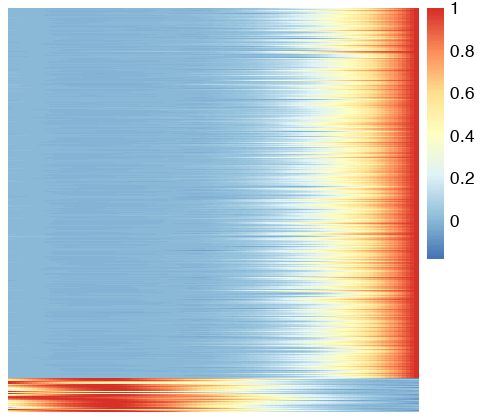

In [62]:
dat.sub.2.scale <- t(apply(dat.sub,1,function(x) x/max(x)))
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)

2  clusters  0.615 
3  clusters  0.334 
4  clusters  0.304 
5  clusters  0.282 
6  clusters  0.265 
7  clusters  0.28 
8  clusters  0.265 
9  clusters  0.265 
10  clusters  0.264 



  1   2 
159  30 

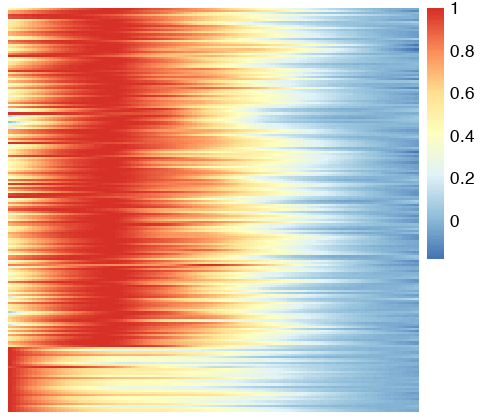

In [63]:
dat.sub.2.scale <- dat.sub.2.scale[pk.scale$pamobject$clustering==2,]
pk.scale<- pamk(dat.sub.2.scale,critout=T)
table(pk.scale$pamobject$clustering)
pheatmap(dat.sub.2.scale[order(pk.scale$pamobject$clustering),],scale="none",cluster_rows = F,cluster_cols = F,
         show_rownames = F,show_colnames = F)